# Visualizing image data with astropy.visualization

In the previous tutorials, when we have made plots of the image data, the axes have showed pixel coordinates. However, you may want to show the world coordinates, and optionally a coordinate grid on the image. The [astropy.visualization](http://docs.astropy.org/en/stable/visualization/index.html) sub-module provides a way to do this that integrates with Matplotlib ([astropy.visualization.wcsaxes](http://docs.astropy.org/en/stable/visualization/wcsaxes/index.html)).


<section class="objectives panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-certificate"></span> Objectives</h2>
</div>


<div class="panel-body">

<ul>
<li>Make an image plot with Matplotlib with world coordinates shown</li>
<li>Customize the ticks, tick labels, and axis labels</li>
<li>Overplot data (points and contours) on top of the image</li>
<li>Overplot different coordinate systems</li>
<li>Normalizing and stretching image data</li>
</ul>

</div>

</section>


## Documentation

This notebook only shows a subset of the functionality in astropy.visualization. For more information about the features presented below as well as other available features, you can read the
[astropy.visualization](http://docs.astropy.org/en/stable/visualization/index.html) documentation.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('image', origin='lower')
plt.rc('figure', figsize=(10, 6))

## Making a simple plot

We start off by loading in the GAIA source density image from previous tutorials:

In [2]:
from astropy.io import fits
hdulist = fits.open('data/LMCDensFits1k.fits')

and we extract the WCS from the header:

In [3]:
from astropy.wcs import WCS
wcs = WCS(hdulist[0].header)

We can now use Matplotlib as normal but passing the ``projection=`` keyword argument to the ``subplot`` function:

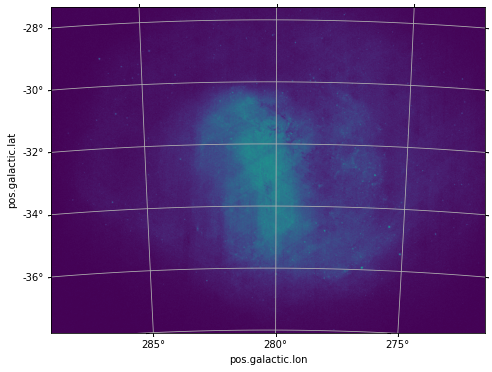

In [4]:
ax = plt.subplot(projection=wcs)
ax.imshow(hdulist[0].data)
ax.grid()

As you can see, this automatically shows the longitude and latitude on the axes and calling ``grid`` shows the curved grid of the celestial sphere!

## Customizing ticks and labels

When using a WCS projection, controlling the ticks, tick labels, and axis labels is a little different to normal Matplotlib - this is because there is now not a one to one correspondance between world coordinates and pixel axes, so talking about the 'x' or 'y' ticks does not make sense in some cases, and instead we should talk about e.g. longitude and latitude ticks.

Once you have a plot initialized, you can access the ``ax.coords`` property which gives you access to ways of controlling each world coordinate. You can either index this by an integer for the index of the world coordinate:

In [5]:
lon = ax.coords[0]
lat = ax.coords[1]

or, in the case of common coordinate systems, by their name:

In [6]:
lon = ax.coords['glon']
lat = ax.coords['glat']

The object you have for each coordinate can then be used to customize it, for example to set the axis labels:

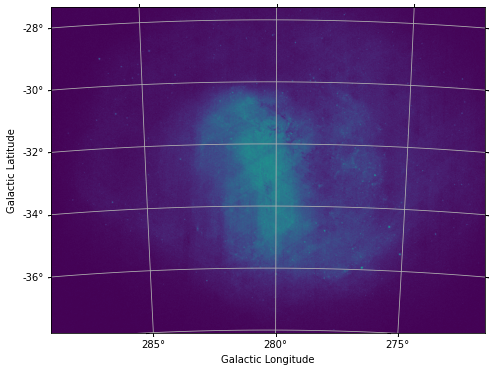

In [7]:
lon.set_axislabel('Galactic Longitude')
lat.set_axislabel('Galactic Latitude')
ax.figure

The tick label format:

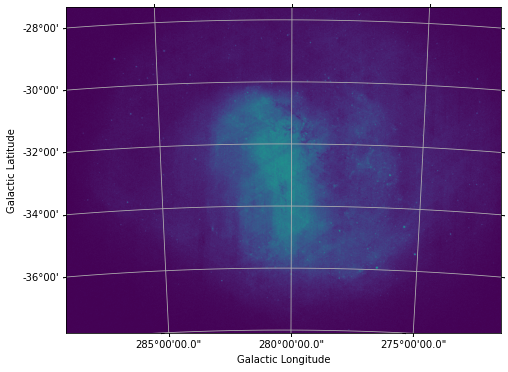

In [8]:
lon.set_major_formatter('dd:mm:ss.s')
lat.set_major_formatter('dd:mm')
ax.figure

The tick spacing or the number of ticks:

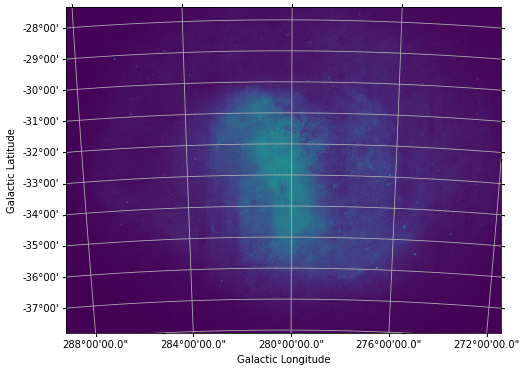

In [9]:
from astropy import units as u
lon.set_ticks(spacing=4. * u.deg)
lat.set_ticks(number=10)
ax.figure

Since the world axes are not necessarily tied to a single pixel axis, it is possible to show each coordinate on any of the axes:

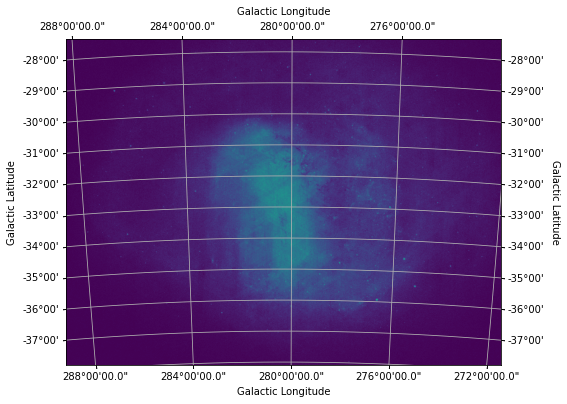

In [10]:
lon.set_ticks_position('bt')
lon.set_ticklabel_position('bt')
lon.set_axislabel_position('bt')
lat.set_ticks_position('lr')
lat.set_ticklabel_position('lr')
lat.set_axislabel_position('lr')
ax.figure

## Overlaying markers and contours

By default, the normal Matplotlib methods on axes should work, and assume pixel coordinates:

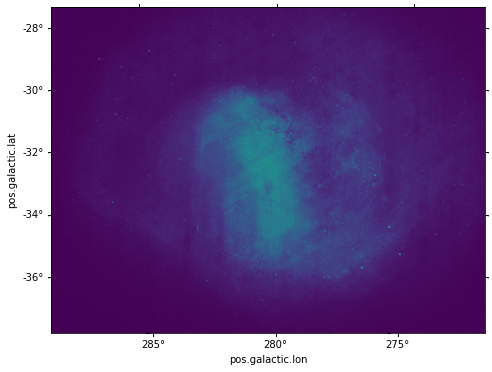

In [11]:
ax = plt.subplot(projection=wcs)
ax.imshow(hdulist[0].data)

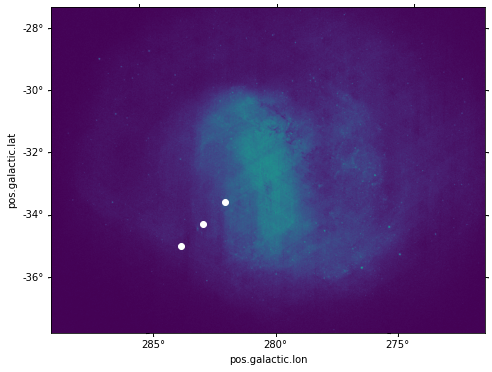

In [12]:
ax.plot([300, 350, 400], [200, 250, 300], 'wo')
ax.figure

However, most Matplotlib methods can take a ``transform=`` option which allows us to plot data in various coordinate systems. For example, to plot markers in Galactic coordinates, we can do:

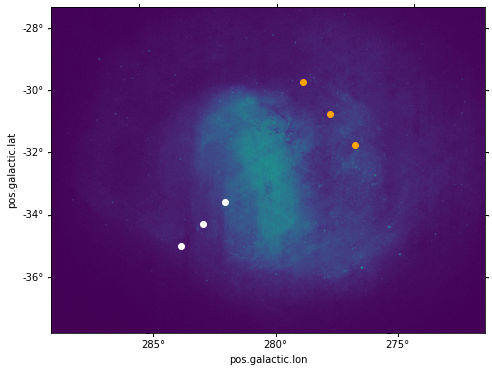

In [13]:
ax.plot([279, 278, 277], [-30, -31, -32], 'o', color='orange', transform=ax.get_transform('world'))
ax.figure

In this case we used ``'world'`` but we could also have explicitly said ``'galactic'`` or plotted markers in e.g. ``'fk5'``. You can also pass astropy coordinate frames to this if needed.

To overplot contours, you can use a similar approach, but in this case ``get_transform`` should be given the WCS object for the contour map. We can try this out by using an IRAS 100 micron map of the LMC:

In [14]:
hdulist_iras = fits.open('data/ISSA_100_LMC.fits')
wcs_iras = WCS(hdulist_iras[0].header)

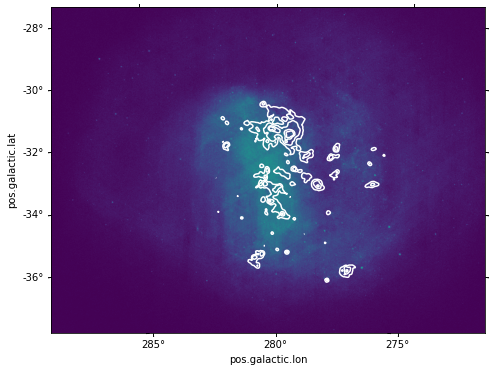

In [15]:
ax = plt.subplot(projection=wcs)
ax.imshow(hdulist[0].data)
ax.contour(hdulist_iras[0].data, transform=ax.get_transform(wcs_iras),
           colors='white', levels=[50, 100, 250, 500])

## Overlaying a different coordinate grid

Another useful feature is the ability to overplot different coordinate systems - for example in the above case we can add an RA/Dec grid and ticks for reference:

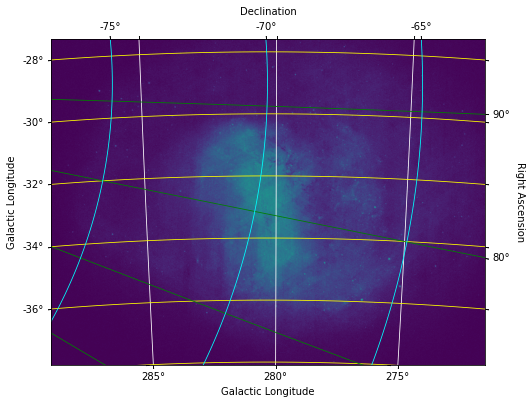

In [16]:
ax = plt.subplot(projection=wcs)
ax.imshow(hdulist[0].data)

lon, lat = ax.coords
lon.set_axislabel('Galactic Longitude')
lat.set_axislabel('Galactic Longitude')

ra, dec = ax.get_coords_overlay('icrs')

dec.set_axislabel('Declination')
dec.set_ticks_position('t')
dec.set_ticklabel_position('t')
dec.set_axislabel_position('t')

ra.set_axislabel('Right Ascension')
ra.set_ticks_position('r')
ra.set_ticklabel_position('r')
ra.set_axislabel_position('r')

lon.grid(color='white')
lat.grid(color='yellow')
ra.grid(color='green')
dec.grid(color='cyan')

## Normalizing and stretching data

Another set of functionality in the [astropy.visualization](http://docs.astropy.org/en/stable/visualization/) sub-package are classes and functions to help with normalizing and stretching data. The easiest way to use this is to use the [simple_norm()](http://docs.astropy.org/en/stable/api/astropy.visualization.mpl_normalize.simple_norm.html#astropy.visualization.mpl_normalize.simple_norm) function:

In [17]:
from astropy.visualization import simple_norm

In [18]:
sqrt_norm = simple_norm(hdulist[0].data, stretch='sqrt', percent=99.5)

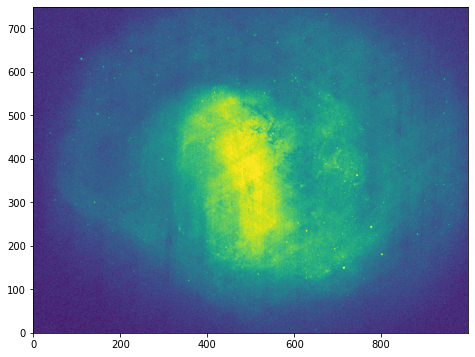

In [19]:
plt.imshow(hdulist[0].data, norm=sqrt_norm)


<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Challenge</h2>
</div>


<div class="panel-body">

<ol>
<li>Make a figure of the IRAS data used above, with the GAIA source density map shown as a contour (note that you might need to smooth the GAIA source density image - check the <a href="https://docs.scipy.org/doc/scipy/reference/ndimage.html">scipy.ndimage</a> module for some useful functions!)</li>
<li>Add the positions of the GAIA sources from the table used in previous tutorials to the image</li>
<li>If you have FITS images available, try this out with your own data!</li>
</ol>

</div>

</section>


<center><i>This notebook was originally written by <a href="https://aperiosoftware.com/">Aperio Software Ltd</a> and modified by Brigitta Sipőcz. &copy; 2019-2021 and is licensed under a <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License (CC BY 4.0)</a></i></center>